In [ ]:
#Территория развития плёночной фотографии. Паблик 無秩序と工芸

In [10]:
import vk

In [11]:
token = "f0077b7cf0077b7cf0077b7c2ef07484fdff007f0077b7caf62839b97216ca7030c14ee"  # Сервисный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)  # Авторизация

In [12]:
personal_token = "0ac715a9865b0b43124097eee88dc65e99a7053616668fd786af5f0436d7ad7b050c16dde74e980f6bd41"  # Персональный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=personal_token)  # Авторизация
vk_personal_api = vk.API(session)  # Авторизация

In [13]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [14]:
members = get_members("besporyadokitehnologia") 

In [15]:
print (len (members))

63956


In [16]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [17]:
save_members_to_file ("besporyadokitehnologia_members", members)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import pandas as pd

df = pd.read_csv("besporyadokitehnologia_members", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [20]:
city_count  = df['city'].value_counts().drop('-')
city_count = city_count[:30] 
print(city_count)

Moscow              7140
Saint Petersburg    5698
Minsk               1201
Yekaterinburg        912
Kyiv                 609
Krasnodar            438
Novosibirsk          438
Kazan                414
Rostov-on-Don        381
Samara               357
Nizhny Novgorod      343
Voronezh             342
Krasnoyarsk          280
Perm                 277
Kharkiv              267
Tyumen               234
Kaliningrad          232
Chelyabinsk          232
Omsk                 230
Volgograd            229
Ufa                  218
Izhevsk              213
Vladivostok          213
Almaty               181
Simferopol           178
Yaroslavl            173
Tomsk                173
Irkutsk              171
Saratov              153
Gomel                120
Name: city, dtype: int64


In [20]:
sex_count  = df['sex'].value_counts().drop('-')
print(sex_count)

F    35739
M    28181
Name: sex, dtype: int64


In [21]:
birth_count  = df['birth'].value_counts().drop('-')
birth_count = birth_count[:20] 
print(birth_count)

2000    2524
1999    2322
1998    2119
2001    1916
1997    1637
2002    1324
1996    1200
1995     879
2003     690
1994     612
1993     453
2004     449
1992     366
1991     298
2005     287
1990     277
1902     226
1989     201
2006     200
1988     174
Name: birth, dtype: int64


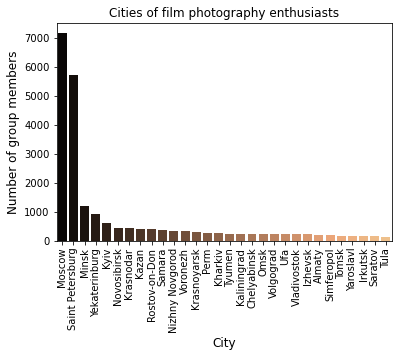

In [22]:
sns.barplot(city_count.index, city_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Cities of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

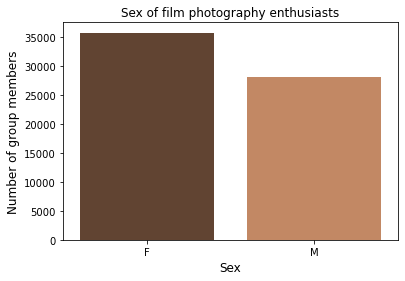

In [23]:
sns.barplot(sex_count.index, sex_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Sex of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.show() # показываем изображение

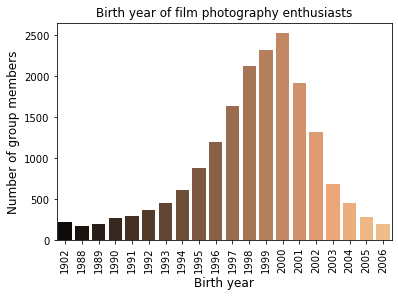

In [24]:
sns.barplot(birth_count.index, birth_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Birth year of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

In [27]:
new_df = df[df['sex'].ne('-')] # оставлем тех, кто указал свой пол
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # оставлем тех, кто указал свой возраст

<ipython-input-27-79f7398bdecb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # оставлем тех, кто указал свой возраст


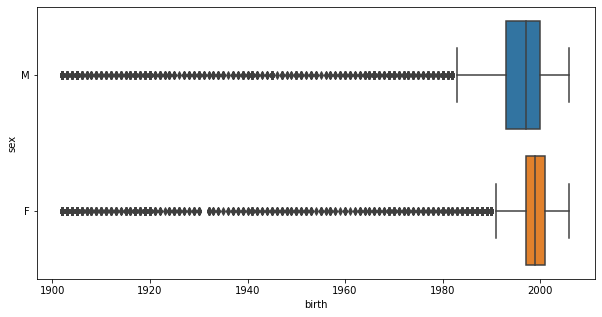

In [28]:
plt.figure(figsize=(10,5)) # размер графика
sns.boxplot(x="birth", y="sex", data=new_df) # строим график
plt.show()


In [53]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [54]:
posts = get_posts("besporyadokitehnologia")
print (len(posts))

8782


In [34]:
from datetime import datetime

In [35]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return data

In [36]:
posts_besporyadokitehnologia = get_posts ('besporyadokitehnologia')

In [37]:
for i in posts_besporyadokitehnologia:
    print(i['text']) #тексты

    print('likes:', i['likes']['count']) # количество лайков
    print('reposts:', i['reposts']['count']) # количество репостов
    print('comments:', i['comments']['count']) # количество комментариев

    date = datetime.fromtimestamp(i['date'])
    print(date.year)

    print("==========")

Kodak Ultramax 400
Olympus Mju-iii Zoom 120
Inst : laceyscans
likes: 110
reposts: 2
comments: 2
2020
Kodak Vision3 500T
inst: demidovich_film

Minsk
likes: 453
reposts: 5
comments: 7
2020
просроченная Fujifilm c200
Olympus mju V
likes: 147
reposts: 0
comments: 0
2020
kazan, august 2020
kodak color plus 200
inst: kiyomieternal
likes: 349
reposts: 0
comments: 11
2020
Olympus Mju ii
Kodak Color Plus 200 и Kodak Ultramax 400
inst.: whois_boris

Стамбул
likes: 162
reposts: 1
comments: 1
2020
Canon eos 300 (sigma 30mm 1.4 art) 
kodak gold 200 
inst: rafaellsio

август-октябрь 
Петербург
likes: 118
reposts: 1
comments: 0
2020
kodak gold, fuji xtra 

inst: necaxep
likes: 550
reposts: 2
comments: 8
2020
mju ii
instagram: artemkunz
likes: 388
reposts: 2
comments: 9
2020
spb oct 2020!
olympus mju iii
ilford pan 400
likes: 425
reposts: 9
comments: 0
2020
Olympus Sup.zoom120
Kodak Color plus/ Gold

Inst: itstruelazy
likes: 198
reposts: 1
comments: 1
2020
Снято на Zenit ET, плёночка kodak gold 200, 

reposts: 1
comments: 11
2020
Москва
Лето 2020
likes: 360
reposts: 3
comments: 5
2020
mju ii
instagram: artemkunz
likes: 482
reposts: 4
comments: 2
2020
Kodak Pro-Star 555
ilford 400
likes: 394
reposts: 2
comments: 3
2020
Bronica RF 645 
Kodak portra 400
likes: 293
reposts: 3
comments: 5
2020
kodak star zoom 70 / mju ii
kodak color plus 200 
inst: a.1lish
likes: 249
reposts: 1
comments: 6
2020
The island 🌴
likes: 758
reposts: 7
comments: 20
2020
Olympus mju 2
Kodak ultra 400 (просрочка 2009г)
Inst: @kostyabik 

Minsk
likes: 484
reposts: 2
comments: 2
2020
ricoh KR-1Ox
kodak vision3 25OD

inst: mnrkvt
likes: 269
reposts: 2
comments: 4
2020
Olympus af10 mini, Kentmere Pan 400

inst: krsnw
likes: 242
reposts: 1
comments: 1
2020
Крымский вайб 
Olympus muy II
Fuji superia 100
likes: 345
reposts: 1
comments: 2
2020
Odessa, Ukraine
Yashica T5 + Kodak Ultramax 400 / Portra 400
likes: 430
reposts: 3
comments: 1
2020
#Пленка 
Инжир, Крым 
Olympus OM10, Fujicolor 400
likes: 496
reposts: 4
comments

Atlantic ocean 2020
likes: 1112
reposts: 24
comments: 19
2020
Tokyo, Japan
Konica lens 2B WB
Fujicolor C200
likes: 644
reposts: 16
comments: 4
2020
minolta af-s 
sfl k500t
Тайланд
likes: 238
reposts: 2
comments: 0
2020
Olympus IS-3000 
kodak color plus 
Байкал 
 
inst: @n_timan
likes: 370
reposts: 5
comments: 1
2020
Общага. 
Засиделись!
 
Санкт-Петербург 
 
fuji superia 400 
 
inst: timfreerider
likes: 506
reposts: 3
comments: 10
2020
остров Катандуанес, Филиппины
Март 2020

Panasonic C-D3100ZM
Fujifilm Superia 400
likes: 377
reposts: 4
comments: 1
2020
Nikon FG-20
Kodak Ektar 100

Lviv/Lviv oblast/Kryvyi Rig

inst: chakred__
likes: 288
reposts: 1
comments: 3
2020
New Zealand 🇳🇿 - 2020 
Dynax 505si 
Рандомные плёнки
likes: 480
reposts: 8
comments: 5
2020
nikon af240sv
fuji 200
vladivostok
likes: 1038
reposts: 23
comments: 11
2020
zenit ET 
fujifilm superia 400
canada, ontario 
 
inst: n_timan
likes: 680
reposts: 9
comments: 11
2020
Майская смена второго полевого сезона археолого-геогра

comments: 2
2020
питерский мрак 
 
kodak gold 
 
inst: timfreerider
likes: 700
reposts: 6
comments: 9
2020
Moscow faces
Olympus mju iii wide 100
Fuji 400
inst: sostoyaniedushi
likes: 488
reposts: 2
comments: 15
2020
Milano Fashion Week 2020
Olympus mju ii / Nikon F55 // Fujicolor c200
inst: kapv_35mm
likes: 408
reposts: 10
comments: 1
2020
SPAIN

samsung VEGA 140
likes: 502
reposts: 8
comments: 4
2020
Contax st
KodakVision 500t
Inst: borrrisov

Павел Борисов
likes: 408
reposts: 3
comments: 3
2020
❗️Здравствуйте. Хочу спросить вопрос у знающих по поводу сьемки в студии на пленку: 
 кто уже снимал, и успешно, как вы решили вопрос со светом? Нормально ли подключаются синхронизаторы к старому Зениту? С какой выдержкой и диафрагмой кадры будут оптимально экспонированы? 
 Хочу пофотографироыать в студии на Зенит ЕТ, но начиталась на форумах, что почти нереально получить хорошие кадры, тк они то засветятся, то свет не успеет попасть..
likes: 336
reposts: 2
comments: 24
2020
Tel Aviv.Haifa.Ris

likes: 334
reposts: 2
comments: 6
2019
Minolta SRT-201 
Fujifilm superia x-tra 400
Akita, Japan
likes: 270
reposts: 1
comments: 0
2019
📍KARELIA 
📸Olympus µ[mju Zoom 14
🔗inst: cameraroll35mm
likes: 710
reposts: 7
comments: 4
2019
Minolta Dynax SP XI AF 35-70
Fuji Superia X-TRA 400
inst: yasnostmisley
likes: 705
reposts: 12
comments: 16
2019
Olympus trip xb3
Kodak color 200
Краснодарский край и не только
likes: 268
reposts: 3
comments: 0
2019
Canon prima af-7, fujicolor c200
Феодосия/ Брянск
ph: богема 00-х
likes: 143
reposts: 0
comments: 0
2019
Sochi2018 / november 
samsung slim zoom 290g + fujiifilm xtra400
likes: 649
reposts: 10
comments: 7
2019
Matros
Canon prima bf-800
Inst: tvoimatras
likes: 351
reposts: 3
comments: 2
2019
Ricoh ff-9
Fuji 400
likes: 226
reposts: 1
comments: 3
2019
Агат-18К
Kodak ColorPlus 200
Санкт-Петербург
likes: 376
reposts: 1
comments: 4
2019
hasselblad 500cm
 kodak portra 400
likes: 185
reposts: 3
comments: 4
2019
Minsk/Lviv
exakta 800AF
enterna 160
likes: 188

USA
Pentax PC35AF-M
Fuji 400
likes: 372
reposts: 8
comments: 2
2019
Contax T3 + kodak portra 160 
Нашествие 2019
likes: 92
reposts: 0
comments: 0
2019
Helsinki, Finnland
likes: 452
reposts: 1
comments: 4
2019
minolta riva zoom rico
fujifilm 400
Париж, весна 2019
likes: 197
reposts: 1
comments: 0
2019
Canon EOS 300
Kodak 200 
Португалия
likes: 525
reposts: 5
comments: 4
2019
Portra 160 
Olympus 
China, Shanghai
likes: 438
reposts: 10
comments: 3
2019
Rome
ML50 mm 1:1.9
Юпитер-8

Kodak Portra 160
Kodak T-max 100
Fujifilm Superia 400
likes: 228
reposts: 2
comments: 0
2019
новосибирск
minolta 7000
likes: 161
reposts: 1
comments: 0
2019
Калининград 
(september 2019)
📷olympus mju
🎞 Fuji Superia X-tra 400
likes: 299
reposts: 5
comments: 4
2019
Peterburg 

Hp-5 
Olympus-om2n
likes: 324
reposts: 9
comments: 2
2019
Canon мыльница
Fuji 400
Нижний Новгород
likes: 235
reposts: 1
comments: 3
2019
pentax k1000 + kodak ultramax 400 
Na Chang Vietnam 
inst: einfaltsol
likes: 326
reposts: 6
comments: 2


reposts: 2
comments: 4
2019
samsung fino 30s
fujifilm 200
Moscow
likes: 255
reposts: 1
comments: 0
2019
Agfa APX 400, Kodak Portra 400
likes: 167
reposts: 2
comments: 0
2019
разные страны на какой-то самсунг 🗺
likes: 182
reposts: 0
comments: 7
2019
samsung fino 80xl
kodak 200
likes: 270
reposts: 1
comments: 2
2019
contax g1 & fuji
inst: walentiaga
likes: 336
reposts: 1
comments: 3
2019
Moscow/Saint.P summer vibesss.. 
Olympus super zoom120 
Kodak color plus 200 
Inst:og_point
likes: 228
reposts: 1
comments: 0
2019
Pentax ME + Fujicolor c200 
Екатеринбург
likes: 273
reposts: 9
comments: 2
2019
Pentax Esprio 140M / Kodak 200.
likes: 391
reposts: 5
comments: 4
2019
Vietnam
pentax k1000 + kodak utramax 400

einfaltsol
likes: 434
reposts: 6
comments: 2
2019
kodak ultramax 400
inst dariliciouz
minsk/belarus
likes: 981
reposts: 6
comments: 23
2019
canon prima mini II
Kodak vision 3 250d
likes: 398
reposts: 4
comments: 7
2019
Zenit 122
Helios 44m-7
fuji 200
likes: 311
reposts: 2
comments: 0
20

likes: 81
reposts: 0
comments: 0
2019
olympus mju ii
kodak 200
bali-philippines
likes: 263
reposts: 2
comments: 0
2019
СМЕНА 8-М

FUJICOLOR 200
likes: 325
reposts: 3
comments: 6
2019
Зенит Е
Кодак 200
likes: 393
reposts: 4
comments: 0
2019
Абхазия 2019
SKINA Techno 2 
Kodak ColorPlus
likes: 724
reposts: 11
comments: 11
2019
📷зенит-е / 🎞kodak pro image 100
likes: 200
reposts: 3
comments: 1
2019
olympus xa2 + kodak color 200
likes: 278
reposts: 2
comments: 2
2019
разные люди, разные плёнки
canon EOS3000
likes: 694
reposts: 7
comments: 18
2019
Pentax ME
fuji c200, fuji x-tra 400, kodak 200
город Екатеринбург, лето 2019
likes: 282
reposts: 4
comments: 5
2019
olympus superzoom 800s
Москва
likes: 364
reposts: 4
comments: 0
2019
грузия
samsung ecx-1
kodak color plus
likes: 222
reposts: 1
comments: 0
2019
Крым, Ласпи
Polaroid 2000ff
Kodak 200
likes: 252
reposts: 2
comments: 2
2019
Санкт-Петербург 
Агат 18к
Kodak ColorPlus 200
likes: 785
reposts: 8
comments: 3
2019
Minolta DYNAX 500si
Minolta A

likes: 258
reposts: 1
comments: 5
2019
Vienna, Austria 
olympus mju iii 120 
kodak200
inst: nzraf
likes: 277
reposts: 0
comments: 0
2019
gr1s / ultramax
likes: 387
reposts: 2
comments: 18
2019
Olympus AF-10 mini
Kodak color plus 200

inst: bogtype
likes: 290
reposts: 2
comments: 7
2019
skina SK-102 | Zenit 122 | Olympus superzoom 105G
fuji 200
inst: nika.niks
likes: 165
reposts: 2
comments: 1
2019
Boston, NY, Miami
olympus mju ii
likes: 550
reposts: 10
comments: 0
2019
Ялта 2019
Yashica T5 + Portra 160
likes: 505
reposts: 6
comments: 8
2019
olympus infinity mini
Rimini
likes: 241
reposts: 2
comments: 1
2019
Из Петербурга в Таллин 
Nikon F100 // Kodak Ultramax 400
likes: 484
reposts: 2
comments: 6
2019
Вьетнам / Гонконг

Muji ||
Fujifilm 400 просрочка
likes: 654
reposts: 15
comments: 16
2019
Барселона
апрель
olympus mju ii
likes: 311
reposts: 3
comments: 1
2019
глазами белоруса
mju 2 
@devaburya
likes: 558
reposts: 5
comments: 9
2019
Panasonic Mini & Zoom
Fujifilm superia x-tra 400, col

2019
Olympus mju I / Kodak200 
inst: kiryaromanova 
[club151487990|ну посмотрим]
likes: 223
reposts: 4
comments: 3
2019
костя 
Kodak 200
likes: 370
reposts: 3
comments: 19
2019
JEC 920 II
Fujicolor Industrial 100
likes: 267
reposts: 1
comments: 1
2019
Moldavian Republic,Pridnestrov'ye,Dubăsari 
`April 2019 
Camera: olympus mij II
likes: 158
reposts: 0
comments: 6
2019
Street stories Palma de Mallorca and Brussels 
📷 Praktica 
🎞 Кодак 200 
# плёнка
likes: 220
reposts: 1
comments: 0
2019
yakutsk
may
olympus superzoom
likes: 458
reposts: 5
comments: 2
2019
Таис Лабуз
likes: 232
reposts: 0
comments: 2
2019
Бесконечное лето
likes: 527
reposts: 5
comments: 13
2019
🌿«Вдыхая лето»

Canon eos 300
Canon EF 50 mm f/1.8
Kodak ColorPlus 200
likes: 157
reposts: 0
comments: 3
2019
Fuji DL-300
Kodak Gold 200
likes: 622
reposts: 7
comments: 6
2019
St. Petersburg 
kodak gold
likes: 574
reposts: 1
comments: 8
2019
Смена 8м
likes: 182
reposts: 1
comments: 0
2019
ektar 100 / canon ae-1
likes: 672
reposts: 

reposts: 2
comments: 2
2019
Samsung af-333
Fujicolor c200

Центр города Екб
Прощальная плёнка на этот фотак
likes: 279
reposts: 1
comments: 4
2019
Fujicolor 200
Amsterdam'19
likes: 309
reposts: 0
comments: 3
2019
Париж/Прага/Будапешт

Canon prima zoom65
Kodak ultramax 400/24 (просрочка)
likes: 372
reposts: 5
comments: 19
2019
kiev 4m 
fujicolor 200
novosibirsk
likes: 829
reposts: 4
comments: 10
2019
Olympus superzoom 70g 
Fujicolor c200
Inst: talosone1
likes: 342
reposts: 4
comments: 4
2019
canon 3000eos 
kodak
май 2019
стамбул/тбилиси
likes: 398
reposts: 2
comments: 12
2019
Смена 8м
Киото
likes: 662
reposts: 7
comments: 6
2019
kodak ke40
kodak 200 gold
likes: 281
reposts: 1
comments: 7
2019
Запахи весны
Москва
Olympus mju 2 zoom 80
Kodak 200 просрочка
Inst molkinna
likes: 232
reposts: 2
comments: 4
2019
Солянка
Canon Prima Af
Kodak Color 200
@ Punknotvlad
likes: 238
reposts: 1
comments: 2
2019
Athens, Greece
Fujifilm superia 400, kodak colorplus 200
Nikon n90s
Plixor 105mm f3.5, Quant

minolta riva zoom 115 ex / kodak colorplus 200
mju ii zoom 80 / fujicolor c200
likes: 220
reposts: 4
comments: 2
2019
Olympus mju I / Fuji 200
inst: kiryaromanova
likes: 225
reposts: 1
comments: 9
2019
Kyiv
Ricoh FF-9, Fujicolor 400

_saranskov
likes: 223
reposts: 2
comments: 1
2019
Зенит-122
Гелиос-44м-6
Fujifilm 400
likes: 154
reposts: 1
comments: 0
2019
Olympus mju ii
Лиссабон
likes: 365
reposts: 5
comments: 1
2019
portra
MINOLTA
Novosibirsk
FFAF w/XΛN
likes: 226
reposts: 0
comments: 0
2019
canon prima mini II 
kodak 250d
Inst: olegkolsky
 onemorecoil
likes: 166
reposts: 0
comments: 1
2019
fuji stx-2 50mm, 1:1.9
kodak ultramax 400
likes: 271
reposts: 1
comments: 14
2019
Firenze
Nikkormat FT2
Kodak color 200
inst: nebonochnoye
likes: 204
reposts: 3
comments: 2
2019
Kyiv, 2019
Olympus Mju II + Kodak Ultramax 400
Fuji Frontier 500
inst: isaweverything
likes: 267
reposts: 0
comments: 13
2019
kazan
mju |||
kodak 200
likes: 197
reposts: 1
comments: 4
2019
Olympus superzoom 70g 
Fujicolor 

comments: 0
2019
Moscow
Olympus mju iii wide 100
Fuji 200
inst: sostoyaniedushi
likes: 395
reposts: 1
comments: 2
2019
X-tra 400
Mju2
Inst: serrcher
likes: 119
reposts: 0
comments: 0
2019
Kyiv
minolta af101r
likes: 283
reposts: 2
comments: 7
2019
Olympus superzoom 70g
Fujifilm superia 400
Inst: talosone1
likes: 244
reposts: 2
comments: 5
2019
Первая плёнка 
Zenit ФС-12
Kodak Color Plus 200
likes: 298
reposts: 2
comments: 3
2019
fuji stx-2
likes: 344
reposts: 2
comments: 7
2019
olympus mju ii
superia xtra 400
likes: 228
reposts: 1
comments: 1
2019
Samsung Fino 30se
kodak color plus 200 / Fuji superia xtra 400

inst: nickolayk
likes: 205
reposts: 0
comments: 0
2019
olympus mju ii zoom 80
fujicolor c200
likes: 213
reposts: 1
comments: 4
2019
Португалия 2019
Canon A-1
Kodak Portra 400, Fuji C200, Kodak Color Plus 200
likes: 574
reposts: 9
comments: 6
2019
Zenit 122k 
Fuji 200
likes: 196
reposts: 0
comments: 3
2019
СПб ‘19
Zenit ET + Helios
likes: 264
reposts: 0
comments: 13
2019
olympus 70

likes: 206
reposts: 0
comments: 7
2019
canon eos 300
fuji 200/400
likes: 173
reposts: 0
comments: 1
2019
Описание внутри.
likes: 206
reposts: 1
comments: 0
2019
Париж
февраль
olympus af-10 mini
likes: 822
reposts: 22
comments: 0
2019
Москва/область. 2018. 
Зенит 11
Просрочка.
likes: 251
reposts: 2
comments: 4
2019
Рубежевичи, Беларусь.
2018 год.
likes: 226
reposts: 3
comments: 0
2019
Israel’19
Kodak 200
likes: 237
reposts: 1
comments: 1
2019

likes: 155
reposts: 0
comments: 3
2019
kodak 200 // samsung fino 35se
likes: 229
reposts: 2
comments: 1
2019

likes: 257
reposts: 1
comments: 3
2019
Берлин, январь 19
yashica t3 / kodak portra 800, fuji 200
likes: 173
reposts: 2
comments: 0
2019
Ricoh Fx 30
Codak color 200
likes: 235
reposts: 2
comments: 6
2019
Санкт-Петербург 2018 
 Kodak 400
Fuji xtra400
Canonet ql17 g3
likes: 265
reposts: 1
comments: 1
2019
olympus pen ee-2
kodak 200
carpathians
likes: 566
reposts: 10
comments: 13
2019
Sölden Austria
Olympus IS-100 
inst:marmotcollectingmaize
l

2019
Olympus trip 505
kodak color plus 200
likes: 189
reposts: 1
comments: 1
2019
Минск-декабрь
Olympus
likes: 126
reposts: 1
comments: 0
2019
Premier gp58
Fujicolor c200
Екатеринбург
likes: 172
reposts: 1
comments: 0
2019
Canon EOS 3000
Kodak Portra 800
СПб
likes: 213
reposts: 2
comments: 2
2019
Olympus Accura Zoom 🎞Fujifilm c200
likes: 178
reposts: 0
comments: 0
2019
Yevpatoriya 
Konica BigMini 301, Kodak Ektar 100
likes: 242
reposts: 2
comments: 0
2019
Olympus AF-10
ИГ @la_deevi
with love for you 💔
and thank you for publishing!
likes: 448
reposts: 5
comments: 9
2019
Нижний Новгород, декабрь
kodak 200
inst: sonyanikova
likes: 86
reposts: 0
comments: 2
2019
Olympus superzoom 70g
Kodak color plus 200
Италия
likes: 196
reposts: 3
comments: 1
2019
Лето, Olympus Mju II.
likes: 124
reposts: 0
comments: 5
2019
Olympus IS-300
Fujifilm 200
декабрь, Москва
likes: 139
reposts: 0
comments: 2
2019
Берлин 19
yashica t3 / kodak portra 800, fuji 200
likes: 313
reposts: 2
comments: 2
2019
Samsung ecx

reposts: 4
comments: 0
2019
canon eos 300
georgia
likes: 155
reposts: 0
comments: 0
2019
Minsk 
Olympus Trip-As-Fuck 20 
Kodak gold chtolee prosrochenyi
likes: 118
reposts: 0
comments: 1
2019
Nikon F50
Fujifilm Superia 200
likes: 93
reposts: 1
comments: 1
2019
Olimpus trip af 50
Moscow city with love
instagram: @hiyorinbaby
likes: 217
reposts: 2
comments: 0
2019
/olympus AF-10 mini/
likes: 166
reposts: 0
comments: 1
2019
Moes 
Olympus is3000/ Fuji superia 400
Moscow
Inst: moes_aud
likes: 258
reposts: 1
comments: 2
2019
Olympus
Fujifilm 400
likes: 220
reposts: 2
comments: 0
2019
Ну что, пришло время сказать вам всем пару тёплых слов, этот год был не легким но очень ярким, спасибо вам ребята, вы славные. Я знаю что Новый год будет ещё лучше, на него мы заготовили для вас не мало интересных событий и не только !

Спасибо вам огромное, люблю вас !!!
likes: 152
reposts: 0
comments: 7
2018
canon super prima 120 
kodak 200 
fuji 400
reagentoftheage
likes: 92
reposts: 0
comments: 0
2018
kodak 

kodak color 200
likes: 149
reposts: 0
comments: 0
2018
mju lll
likes: 171
reposts: 1
comments: 2
2018
Москва/Дубна/Крым 
Олимпус 
Kodak gold image pro 100
likes: 174
reposts: 3
comments: 1
2018
снято на
Zeiss Ikon Nettar 518/16
(Fuji Velvia 100)
в Казани и Москве 

[club136739421|/]
likes: 91
reposts: 0
comments: 0
2018
cтамбул
olympus mju ii zoom 105
kodak color plus 200
likes: 90
reposts: 2
comments: 0
2018
- Canon AE-1 Program 
- Canon FD 50 mm f/1.4 
- Kodak Pro Image 100
likes: 110
reposts: 3
comments: 1
2018
OLYMPUS MJU II 
 Тула
likes: 156
reposts: 3
comments: 0
2018
Эльбрус с севера.
likes: 204
reposts: 1
comments: 0
2018
nikon fg20
agfa 200
likes: 116
reposts: 0
comments: 2
2018
Canon vision 3
Kodak 400
St. Petersburg
Inst: gurmamarkoman
likes: 239
reposts: 2
comments: 4
2018
Разные фотоаппараты 
Разная плёнка 
Разные люди 
Кривой Рог
inst @dimensionfilmms
likes: 208
reposts: 2
comments: 5
2018
canon eos3000
"разное"
likes: 273
reposts: 1
comments: 5
2018
питер/астрахань 
sams

comments: 1
2018
ZenitET
Горный Алтай
Inst: ksugalchi
likes: 219
reposts: 3
comments: 0
2018
Pentax 645
Fujifilm fujicolor PRO 400H
likes: 110
reposts: 0
comments: 0
2018
Minolta Hi-Magic AF2
Kodak ColorPlus 200
likes: 127
reposts: 1
comments: 4
2018

likes: 142
reposts: 1
comments: 0
2018
Швейцария #3
Contax T2 + Pentax Super Program \ Helios 44
likes: 136
reposts: 0
comments: 7
2018
Canon Prima BF Twin / Fujicolor C200

Moscow
likes: 102
reposts: 0
comments: 0
2018
Fuji superia400
likes: 168
reposts: 0
comments: 2
2018
Kodak gold 200
Pentax IQZ EZY
Sicilia 
ig: mr.filya
likes: 160
reposts: 1
comments: 1
2018
Zenit ttl
likes: 193
reposts: 2
comments: 0
2018
Samsung fino 15 se. Kodak color 200 
Липецк. 
2017.
likes: 159
reposts: 0
comments: 2
2018
olympus mju III
kodak color plus 200
@namporadomoi
likes: 126
reposts: 1
comments: 0
2018
Agfa vista 200
inst: e2_photopage
likes: 174
reposts: 2
comments: 6
2018
Canon EOS Kiss 
Canon 50mm f/1.8
Fuji Superia X-tra 400
likes: 253
reposts: 0
c

Olympus Superzoom 700XB
Kodak ColorPlus
Санкт-Петербург
#ФотоСквот
likes: 60
reposts: 0
comments: 1
2018
#ФотоСквот
Kyiv, Ukraine
Olympus mju ii, iii
@kkycheryaviy
likes: 45
reposts: 0
comments: 6
2018
#ФотоСквот 

Киев
Kodak 200 / Olympus superzoom
likes: 22
reposts: 1
comments: 0
2018
#ФотоСквот
Polaroid 35mm High Definition/Fujifilm 200
Роза Хутор⛰
likes: 56
reposts: 0
comments: 2
2018
#ФотоСквот
Olympus Mju ii
Lithuania, Germany, Ukraine, Russia
Instagram: @body_marcus
likes: 84
reposts: 1
comments: 6
2018
#ФотоСквот 
Practica 
Codak 200
likes: 37
reposts: 0
comments: 5
2018
#ФотоСквот
Olympus Mju ii
Spain, Israel, Russia
Instagram: @body_marcus
likes: 62
reposts: 1
comments: 5
2018
#фотосквот
многоплёнок / mju / eos300
sergo.film
likes: 25
reposts: 0
comments: 0
2018
#ФотоСквот
Fujifilm superia 200 & Fujicolor C200 
Zenit 122 + Helios 44М-6 
East Georgia, 2018
likes: 35
reposts: 0
comments: 3
2018
#фотосквот
likes: 37
reposts: 0
comments: 1
2018
#фотосквот
Тольятти 
olympus mju 
k

reposts: 3
comments: 1
2018
Olympus Mju II ZOOM 80
Kodak Color Plus 200

Instagram: @quviizy
likes: 89
reposts: 0
comments: 0
2018
kodak cameo, fuji 200
likes: 146
reposts: 0
comments: 2
2018
Kiev, Milan
likes: 326
reposts: 5
comments: 9
2018
Canon AE 1

Anna / insta @yyaankeee
likes: 324
reposts: 1
comments: 10
2018
samsung ff-222 \ fuji colour 200
likes: 98
reposts: 0
comments: 0
2018
Canon AE-1 Program
likes: 167
reposts: 2
comments: 2
2018
olympus trip 300 | kodak 200
likes: 181
reposts: 1
comments: 3
2018
Olympus Superzoom
Washington 
New York
moyomylo
likes: 140
reposts: 0
comments: 0
2018
пленка Fujicolor Print (Industrial) 100 
Иерусалим и Яффа. 
Октябрь 2018.
likes: 129
reposts: 1
comments: 0
2018
sept’18

nikon f50 / leica vario-elmar 
fujifilm superia 400 / kodak gold 200
likes: 186
reposts: 1
comments: 1
2018
Canon prima zoom 70f date/Olympus superzoom 70g
kodak 200/agfa 200/fuji 400

@outburst1337
likes: 164
reposts: 2
comments: 0
2018
Olympus trip
likes: 85
reposts: 0
com

Agfa 200
Olympus 105g
likes: 157
reposts: 1
comments: 5
2018
Ilford hp5 
Malta- Warsaw 2018
Olympus af10
likes: 85
reposts: 1
comments: 1
2018
Моя первая чб
Mju i & Ilford pan 400
inst: vovashvets
likes: 113
reposts: 1
comments: 0
2018
Georgia on film 
@ _inaoko_
likes: 142
reposts: 4
comments: 4
2018
Карелия, Ладога и Карьеры
Фед2, kodak
likes: 138
reposts: 0
comments: 1
2018
espio 115m 
fuji 200 
moscow, nürburgring
likes: 98
reposts: 1
comments: 5
2018
Yashika T-Af / Kodak Ultramax
likes: 72
reposts: 0
comments: 0
2018
Original meet 2018
Canon3000n
AgfaVista200
likes: 167
reposts: 2
comments: 0
2018
Europe 
Olympus mju zoom
likes: 91
reposts: 0
comments: 3
2018
Faces&Laces`18
Zenit E 
Kodak Vision3 Daylight
likes: 142
reposts: 2
comments: 0
2018
Одесса, 2018
Nikon f65, fujifilm superia 200
By nezarokova
likes: 288
reposts: 7
comments: 4
2018
Minsk
inst: rslnkro
likes: 112
reposts: 1
comments: 1
2018
2017 - 2018
Киев, Харьков, Карпаты
likes: 96
reposts: 1
comments: 1
2018
olympus mju

comments: 6
2018
Смена 8м
☀
likes: 113
reposts: 1
comments: 3
2018
Olympus
leto 18
likes: 136
reposts: 0
comments: 0
2018
Zenit ET
Fujifilm superia extra
Нижний Новгород - Москва
likes: 148
reposts: 0
comments: 1
2018
Плёнка. Зенит.
likes: 279
reposts: 0
comments: 6
2018
Pentax espio 115
Portra 160
likes: 204
reposts: 2
comments: 1
2018
Mju ii , Kodak 200 
Moscow
likes: 167
reposts: 0
comments: 6
2018
Москва/Берлин
Olimpusmju2
Fujifilm superia x-tra400/ Fujifilm pro400
likes: 128
reposts: 1
comments: 1
2018
fuji stx-2
fuji superia 400
Châteauroux, France
likes: 161
reposts: 1
comments: 0
2018
fuji 200

yellowmonocle
likes: 112
reposts: 1
comments: 0
2018
Olympus зумчик 105.
likes: 110
reposts: 1
comments: 0
2018
Fujifilm zoom 60 
fujicolor 200
likes: 105
reposts: 1
comments: 6
2018
Тбилиси
Portra 400
Contax Tvs
Inst: @gleb.privet
likes: 102
reposts: 0
comments: 0
2018
kodak ektar 100
zenit 12sd
sochi
likes: 155
reposts: 3
comments: 0
2018
Samsung vega 77 i
Kodak 200
faces&laces
likes: 

likes: 157
reposts: 0
comments: 7
2018
olympus trip, mju 2
kodak 200
likes: 217
reposts: 4
comments: 3
2018
Фэд-5 
Kodak 200
likes: 100
reposts: 0
comments: 0
2018
Kodak400 просрочка
likes: 183
reposts: 0
comments: 2
2018
Вена/Варшава/Прага/Брно
Canon Prima Af S9
likes: 115
reposts: 3
comments: 2
2018
олимпус хб400
кодак просрочка
inst: hikristya
likes: 101
reposts: 0
comments: 1
2018
Olympus Mju-II ZOOM 80 
Kodak Color Plus 200

Bad trip in Kiyv.
likes: 133
reposts: 0
comments: 3
2018
Алушта без тормозов, 2018, mju II.
likes: 307
reposts: 1
comments: 2
2018
Istanbul 
domvozduh
likes: 168
reposts: 0
comments: 3
2018
Samsung fino 35se/fujifilm c200/400
Inst: pasheholepupuncher
inspiredandliza
likes: 106
reposts: 1
comments: 0
2018
mju II
kodak 200
likes: 208
reposts: 3
comments: 0
2018
Canon prima 80u
Konica 1600
likes: 145
reposts: 0
comments: 1
2018
fuji 200 / zenit
@la_deevi

* c любовью из разных лет и мест
likes: 175
reposts: 1
comments: 2
2018
Canon lens
likes: 73
reposts: 0
comme

2018
mju 3 115
kodak200
likes: 119
reposts: 0
comments: 3
2018
olympus trip200
vitebsk
inst: qqw.mp3
likes: 92
reposts: 0
comments: 0
2018

likes: 135
reposts: 4
comments: 3
2018
C200
likes: 119
reposts: 1
comments: 0
2018
Olympus superzoom 80g
likes: 113
reposts: 1
comments: 1
2018
Olympus
Москва
 лето
likes: 276
reposts: 5
comments: 3
2018
olimpus superzoom700xb
kodak 200
Москва
likes: 123
reposts: 1
comments: 1
2018
❤️

Inst.6pola9

無秩序と工芸
likes: 125
reposts: 0
comments: 0
2018
крым, rolleiflex, portra
likes: 119
reposts: 0
comments: 0
2018
Canon prima super130, lomo color negative 100
[Cliffs of Moher, Ireland]
likes: 144
reposts: 0
comments: 2
2018
Olympus AF-1MINI
likes: 145
reposts: 0
comments: 4
2018

likes: 107
reposts: 0
comments: 5
2018
fujicolor c200
canon eos 50e
moscow / june 2018
likes: 91
reposts: 1
comments: 0
2018
IST 18"
Olympus XA 2
likes: 97
reposts: 1
comments: 1
2018
Нижний Новгород \ Павловский Посад \ Петушки
Agfa vista 200 
Nikon f 55
likes: 105
reposts: 0
com

reposts: 1
comments: 6
2018
что-то мутное
likes: 219
reposts: 6
comments: 5
2018
Германия
mju ii
Inst: artemkunz
likes: 110
reposts: 1
comments: 3
2018
Кажется крышка свет пропускает
likes: 322
reposts: 2
comments: 6
2018
Olympus
Saint-Petersburg
People
Fujifilm and Agfa
inst: @metal.company
likes: 107
reposts: 0
comments: 2
2018
Olympus 
Kodak200
likes: 120
reposts: 2
comments: 12
2018
GR1v \ Tiara
likes: 98
reposts: 0
comments: 0
2018
Санкт-Петербург 
olympus mju ii 
fujifilm superia 200
likes: 157
reposts: 0
comments: 1
2018
смена 8м 
аструм 100 
июнь '18
likes: 88
reposts: 0
comments: 0
2018
Клуб 
Mju ll , ilford delta 400
likes: 71
reposts: 0
comments: 1
2018
произошел косяк со сканом, все в шумах, а жаль
olympus superzoom80g
ilford hp5 plus
likes: 107
reposts: 1
comments: 7
2018
гревел кинг '18

olympus mju ii
ilford delta 100

inst: pavelradchenko
likes: 86
reposts: 1
comments: 1
2018
minsk
bmx contest
mju ii х kentmere 400
inst:@artyomgrintsevich
likes: 99
reposts: 0
comments: 

Olympus om-1
Ilford hp5 plus 400, ilford xp2 400
Москва
likes: 54
reposts: 0
comments: 2
2018
смена-8м
ilford pan 100
likes: 75
reposts: 0
comments: 0
2018
spotmatic f
super-takumar 55 1.8 | зенитар 50 1.7
разные чб, в основном тип-Д 200
likes: 92
reposts: 1
comments: 0
2018
Sicilia
nikon fm2
likes: 99
reposts: 4
comments: 0
2018
{I} [PERSPEKTIVA B&W 400]

{II-IV} [ТИП-Д 200]

{V-VI} [KODAK 400TX]

{VII-IX} [ILFORD DELTA 3200]

[] Olympus AF-1 []
likes: 86
reposts: 3
comments: 0
2018
Olimpus af10 mini &kodak 200
likes: 130
reposts: 0
comments: 2
2018
Подходим во время
Мьюшка,вторая
likes: 146
reposts: 0
comments: 0
2018
Olympus mju iii
likes: 108
reposts: 0
comments: 1
2018
Kodak ultramax
SPB
likes: 211
reposts: 4
comments: 4
2018
Canon.
Микс плёнок.
Москва/Солнечногорск/Тверь/Питер
likes: 193
reposts: 1
comments: 7
2018
Italy, Genova 
Nikomat 
inst: @kristinaportilla
likes: 102
reposts: 1
comments: 0
2018
финлэнд
likes: 117
reposts: 0
comments: 0
2018
кэнон три тыщи эн,
Москва.

INST:

reposts: 3
comments: 7
2018
«СВОБОДА» 
JVCR '18
likes: 31
reposts: 0
comments: 3
2018
"СВОБОДА"
Самсунг фино30се
Санкт-Петербург
Объективами @ ioaynkl и @antonbentframe
likes: 66
reposts: 0
comments: 7
2018
«СВОБОДА»
Canon EOS300
north jungle.
likes: 33
reposts: 0
comments: 2
2018
СВОБОДА
плёнки разные
никон af n8008s

Японская деревня и окрестности ‘17
likes: 73
reposts: 1
comments: 4
2018
Свобода
likes: 50
reposts: 1
comments: 4
2018
Свобода 
Разные пленки 
Olimpus mju II
likes: 51
reposts: 2
comments: 3
2018
СВОБОДА 
Ph: НИКИТОС - ДВОРГОДА98 
Konica FC-1 
Olympus [mju] - zoom 140 
Olympus [mju] - III 120 
 
Kodak ColorPlus 200 36exp. 2017
likes: 33
reposts: 1
comments: 2
2018
СВОБОДА 
Zenit APK
Japan 2018
likes: 58
reposts: 1
comments: 4
2018
Praktica M45
Amsterdam
likes: 241
reposts: 1
comments: 3
2018
СВОБОДА
Лучше не придумаешь
likes: 40
reposts: 0
comments: 1
2018
СВОБОДА
likes: 39
reposts: 1
comments: 5
2018
CВОБОДА
разные плёнки
кэнон, олимпус суперзум 70
likes: 38
reposts: 0


Всем быть
likes: 41
reposts: 0
comments: 1
2018
Киев
Yashica AF-M II D / Ricoh FF-9s
AGFA CT Precisa 100
likes: 98
reposts: 1
comments: 4
2018
москва
Olympus, fuji color 200
likes: 160
reposts: 1
comments: 5
2018
mju ii + konica hexar af
Германия
Inst: @artemkunz
likes: 192
reposts: 2
comments: 3
2018
Rostov
likes: 184
reposts: 1
comments: 4
2018
Canon BF Twin
Instagram: angst.in.veins
likes: 81
reposts: 1
comments: 0
2018
b u d a p e s t 
canon EOS 50E
kodak ultra max 400
likes: 81
reposts: 1
comments: 0
2018
Смена 8-М, Fujicolor c200
Екатеринбург
likes: 189
reposts: 0
comments: 8
2018
Такая разная Москва 
Canonmate ae808/olympus mju ii/minolta x300s
Fuji c200/Kodak color 200
Inst: @mr.tweeester
likes: 150
reposts: 2
comments: 0
2018
Yashica T5 + Portra 400
likes: 49
reposts: 0
comments: 1
2018
superia 200
Москва
likes: 99
reposts: 1
comments: 0
2018
Saint-P
likes: 168
reposts: 1
comments: 1
2018
Зенит-12сд + unomat b24
FujiFilm C200
likes: 154
reposts: 1
comments: 2
2018
Мск/СПб 
Mju

comments: 1
2018
olympus af-1 twin
fuji industrial 400
likes: 135
reposts: 1
comments: 3
2018

likes: 120
reposts: 1
comments: 1
2018
mju i, agfa vista 400
nederland, april'18
likes: 111
reposts: 0
comments: 0
2018
lomo lc wide
likes: 138
reposts: 0
comments: 0
2018
mju
agfa vista 400
позавчера
likes: 93
reposts: 0
comments: 0
2018

likes: 126
reposts: 0
comments: 0
2018
Samsung Vega 140s 
Agfa 400
likes: 115
reposts: 1
comments: 0
2018
Agfa Vista 200
Minolta Dynax 5
Minolta 50/1.7
likes: 71
reposts: 0
comments: 0
2018
Zenit-E
Agfacolor 200
Нижний Новгород
likes: 78
reposts: 0
comments: 0
2018

likes: 146
reposts: 1
comments: 0
2018
saint-petersburg 
kodak colorplus 200
inst: applendpark
likes: 115
reposts: 1
comments: 0
2018
Мержаново
Fujifilm 200
likes: 122
reposts: 1
comments: 0
2018

likes: 101
reposts: 0
comments: 2
2018

likes: 83
reposts: 0
comments: 0
2018
f100
 50mm
 xtra 400
likes: 102
reposts: 2
comments: 0
2018
olympus superzoom 70g
vista plus 200
likes: 86
reposts: 1
comme

reposts: 1
comments: 0
2018
Olympus XA-2
likes: 126
reposts: 1
comments: 0
2018
Olympus mju II
likes: 278
reposts: 2
comments: 3
2018
Ярославль 
Kodak ColorPlus 200
likes: 96
reposts: 0
comments: 0
2018
zenit 11
Fujifilm Superia X-tra 400
Garage Museum
likes: 198
reposts: 1
comments: 0
2018
kodak star ef
moscow
likes: 122
reposts: 1
comments: 2
2018
Запретная зона 
- 
Zenit 412 
Kodak ColorPlus
likes: 78
reposts: 0
comments: 0
2018
Zenit
Kodak 400
likes: 149
reposts: 1
comments: 0
2018

likes: 160
reposts: 2
comments: 0
2018
canon 
kodak color 200
likes: 49
reposts: 0
comments: 1
2018
Mamiya Rz67 Pro II + Kodak Ektar 100.
likes: 143
reposts: 0
comments: 0
2018
Фото на память
Inst@dmitrain
likes: 134
reposts: 2
comments: 2
2018
Kodak 400
Fujifilm 400
likes: 180
reposts: 1
comments: 0
2018
Olympus AF-10 mini

Saint-Petersburg.
likes: 130
reposts: 1
comments: 0
2018
ФЭД-5
Великие Луки
likes: 120
reposts: 0
comments: 0
2018
Март, 2018
Киев
Кодак 200
likes: 210
reposts: 2
comments: 3
2018
К

comments: 0
2018

likes: 220
reposts: 1
comments: 0
2018
машинки
милан/париж
canon prima/canon eos 3000
likes: 193
reposts: 4
comments: 0
2018
Minolta SR-1 
Fuji200
likes: 125
reposts: 0
comments: 2
2018
Canon eos 3000
likes: 50
reposts: 0
comments: 0
2018
Brewer
Glass/400iso
likes: 53
reposts: 0
comments: 0
2018
Зенит ЕТ
ilford pan 100
likes: 79
reposts: 1
comments: 0
2018

likes: 43
reposts: 1
comments: 0
2018

likes: 111
reposts: 2
comments: 0
2018
без зла
likes: 58
reposts: 0
comments: 1
2018
olympus mju I
fomapan 200
Helsinki
likes: 97
reposts: 1
comments: 3
2018
Pentax Honey Well SP1000 
ILFORD Delta 400
Arkhangelsk
likes: 76
reposts: 1
comments: 2
2018
Черный Петербург
likes: 93
reposts: 0
comments: 0
2018
эос300в/пан 400/Санкт-Петербург/вечная зима. 

инст: @philipplillo
likes: 129
reposts: 0
comments: 1
2018
Moscow
Olympus om-1
ilford pan 400
likes: 102
reposts: 1
comments: 1
2018
Ilford 400
likes: 80
reposts: 1
comments: 0
2018
zenit11 

inst: d_kraplak
likes: 67
reposts: 1
c

reposts: 8
comments: 1
2018
Олимпус зум, пленку забыл название
likes: 98
reposts: 2
comments: 0
2018
Olympus, Аструм, Москва
likes: 124
reposts: 2
comments: 0
2018
Санкт-Петербург
Клуб
Ilford pan 400
likes: 123
reposts: 3
comments: 0
2018
Olympus mju II 
Ilford pan 400
Инст: macintosh_robinson
likes: 109
reposts: 0
comments: 0
2018
Инст : manzhs 
Olympus superzoom
likes: 124
reposts: 0
comments: 2
2018
Helsinki
Zorki-4
Ilford xp2 400
likes: 99
reposts: 2
comments: 4
2018
Roma
Capodanno '18
inst: andreibabincev
likes: 105
reposts: 1
comments: 0
2018
Зенит Е 
Харьков 
Inst: malchishkaofparis
likes: 216
reposts: 3
comments: 4
2018
Зенит ТТЛ
rollei rpx 400
likes: 105
reposts: 1
comments: 0
2018
Бордо, Франция 
Февраль
likes: 65
reposts: 0
comments: 0
2018
canon prima zoom65
fujicolor 200
likes: 122
reposts: 0
comments: 0
2018
Cоdak color plus 
Moscow, Russia
likes: 87
reposts: 0
comments: 4
2018
ЛОМОГРАФИЯ #2
ЛОМО-КОМПАКТ-АВТОМАТ
likes: 122
reposts: 2
comments: 7
2018
Olympus mju2 zoom80
S

likes: 77
reposts: 1
comments: 0
2018
зоркий
руссар
likes: 117
reposts: 0
comments: 1
2018
samsung af slim zoom
kodak colorplus
Vladivostok
likes: 118
reposts: 0
comments: 0
2018
kodak star 300 md
просроченная kodak gold 400
belgorod/voronezh
likes: 124
reposts: 1
comments: 0
2018

likes: 139
reposts: 1
comments: 0
2018
Olimpus Superzoom 70g
Kodak Color Plus 200
Karachay-Cherkessia
likes: 169
reposts: 1
comments: 0
2018
Canon AF35M 2
Kostroma/Moscow/Barcelona/Tossa de Mar
likes: 129
reposts: 0
comments: 0
2018
mju II
kodak 200 просрочка
likes: 233
reposts: 2
comments: 3
2018
undercloud07.17/nikonfg65/ilforddelta3200
likes: 105
reposts: 0
comments: 2
2018
Olympus 
Аструм 
Москва
likes: 122
reposts: 2
comments: 6
2018

likes: 75
reposts: 0
comments: 2
2018
Canon EOS Kiss
Гелиос 44М
Ilford PAN 100
likes: 61
reposts: 0
comments: 0
2018
Зенит 11
Свема 32
likes: 110
reposts: 1
comments: 0
2018
Zorki 4 /ilford 400
likes: 89
reposts: 0
comments: 3
2018
Olympus mju zoom 115
Аструм 100
likes: 65

saratov 
olympus af-30/fuji 200
likes: 111
reposts: 1
comments: 0
2018
olympus af-10 xb
москва, январь'18
likes: 86
reposts: 1
comments: 1
2018
Minolta,fuji 200 
Krasnodar,New year
Inst: temp.jpeg
likes: 135
reposts: 1
comments: 0
2018
киев / olympus mju 3 / kodak ultra max 400
likes: 210
reposts: 4
comments: 8
2018
Infinity 35-70 + vista 400
likes: 121
reposts: 1
comments: 1
2018
Kiev
Pentax
likes: 220
reposts: 2
comments: 7
2018
Красноярск 
ff-222 
fujifilm c200
likes: 111
reposts: 1
comments: 5
2018
Olympus AF-10 XB
Fuji 400
Ижевск
likes: 198
reposts: 4
comments: 7
2018
Konica C35-EFP
Olympus mju ll
Москва, Питер
2011-2013
likes: 149
reposts: 0
comments: 0
2018
Kodak 200
Msk 
Spb
Prg
likes: 196
reposts: 1
comments: 1
2018

likes: 179
reposts: 2
comments: 1
2018
эх лето
likes: 158
reposts: 1
comments: 1
2018
ФЭД/kodak color plus 200,просрочка 
СПБ
likes: 200
reposts: 4
comments: 2
2018
olympus mju
Москва
likes: 97
reposts: 0
comments: 0
2018
Январь. Хомяк.
Olympus Mju II + Kodak Colo

2018
Olympus superzoom
likes: 70
reposts: 1
comments: 1
2018
olympus superzoom 70G
centuria 100
likes: 132
reposts: 1
comments: 1
2018
Samsung fino 15se
Ростов-на-Дону
likes: 155
reposts: 1
comments: 1
2018
Карелия
likes: 218
reposts: 1
comments: 0
2018
old archive
Pentax MZ-30
likes: 346
reposts: 7
comments: 5
2018
mju ii
kodak color plus 200
likes: 134
reposts: 1
comments: 4
2018
Olympus Mju,Yashica Samurai
Kodak Color 200
Харьков
likes: 188
reposts: 3
comments: 1
2018
не завтракаю по утрам и хожу на рок-концерты
а как проходят Ваши дни? 
olympus af-30/
fuji xtra 400
likes: 171
reposts: 2
comments: 30
2018
Instagram. marchenko_3
likes: 79
reposts: 2
comments: 1
2018
| 6/2017 |
Калининград
Kиев 4ам
Fujicolor c200
likes: 89
reposts: 1
comments: 0
2018
Yo_Tape
2017
likes: 143
reposts: 2
comments: 4
2018
зенит ет
fujicolor c200
likes: 103
reposts: 3
comments: 1
2018
Olympus superzoom 105g
Agfa vista 200
Inst: shmaliys
likes: 135
reposts: 1
comments: 2
2018
gotoivanovo
mjuii
likes: 109
re

2017
Olympus mju iii+ Fujifilm Superia X-tra 400
inst: larijesifiheueohdudd
likes: 71
reposts: 0
comments: 1
2017
Holy Land
Olympus XA 2
Fuji 400
likes: 146
reposts: 2
comments: 2
2017
helsinki
yashicat3
likes: 203
reposts: 5
comments: 3
2017
yakutsk -40°
likes: 130
reposts: 1
comments: 0
2017
@_filmkilla
likes: 185
reposts: 1
comments: 6
2017

likes: 173
reposts: 5
comments: 7
2017
Jerry is the best friend.
likes: 192
reposts: 3
comments: 10
2017
random Warsaw
Zenit TTL
likes: 173
reposts: 1
comments: 0
2017
Mju II
кодак200 просрочка
likes: 237
reposts: 2
comments: 4
2017
Olympus Superzoom 70g
Fujifilm X-TRA 400
likes: 173
reposts: 2
comments: 1
2017
16/17
Mju2
likes: 162
reposts: 3
comments: 2
2017
Kodak STAR ef
likes: 208
reposts: 4
comments: 1
2017
Милое лето 
Olympus 80g и zoom deluxe
Superia 200
likes: 113
reposts: 2
comments: 0
2017
Nikon f65
Fujifilm superia 800, 400
Moscow, 2017
By nezarokova
likes: 89
reposts: 2
comments: 0
2017
Minsk ♥️
OLYMPUS TRIP AF50
likes: 185
reposts: 

reposts: 4
comments: 0
2017
Samsung fino 30 se 
Agfa 200
Петербург 17
likes: 62
reposts: 0
comments: 6
2017
Odessa
Minolta af101r, kodak 200
likes: 87
reposts: 1
comments: 0
2017
NIKON F80
Vitebsk
likes: 137
reposts: 2
comments: 0
2017

likes: 82
reposts: 0
comments: 0
2017
st. petersburg
march`17
canon ae-1
likes: 131
reposts: 0
comments: 0
2017
St.Petersburg 2014
likes: 92
reposts: 2
comments: 0
2017
SPB 
Polaroid 300AF
likes: 164
reposts: 2
comments: 3
2017
мск
БОБ КРОМА & DOPE90 @ 05/11/2017
likes: 115
reposts: 5
comments: 0
2017
Canon 500N + 50mm 1.4
Kodak Color
Кривой Рог
likes: 153
reposts: 3
comments: 4
2017
may/june 17 
zenit et 
kodak colorplus 200
likes: 59
reposts: 0
comments: 0
2017
Samsung Fino 35 sf
fujicolor
inst: chopackbeats
likes: 86
reposts: 0
comments: 2
2017
Финляндия (Хельсинки, Лаппеенранта, Котка )
olympus mju ii
likes: 219
reposts: 2
comments: 1
2017
Olympus superzoom 70g
Просрочка Kodak color 200
likes: 143
reposts: 1
comments: 3
2017
olympus af-10 mini, fuji

Olympus superzoom 100G
likes: 119
reposts: 1
comments: 0
2017
Pentax Espio 928m
likes: 122
reposts: 0
comments: 3
2017
fujicolor 200
likes: 237
reposts: 0
comments: 5
2017
/ms.wein
likes: 172
reposts: 2
comments: 1
2017
лт-1/суперия экстра/осень/Петербург.
likes: 237
reposts: 6
comments: 5
2017
Norway, Lofoten film trip part 2
canon eos 600/fuji superia 200
likes: 142
reposts: 3
comments: 2
2017
SaintP
Olympus 700xb
Superia 200
likes: 102
reposts: 0
comments: 0
2017
санкт-петербург 
kodak colorplus 200
likes: 173
reposts: 1
comments: 0
2017
Samsung Pleomax

Новосибирск
likes: 138
reposts: 1
comments: 2
2017
Oly mjuiii/kodak gold200
likes: 155
reposts: 4
comments: 0
2017
olympus accura//olympus mju ii
kodak просроченная 
и минск осенний
likes: 77
reposts: 1
comments: 2
2017
Zenit-E x Provia
Казань-Рязань 2016
likes: 96
reposts: 1
comments: 0
2017
konica c35 
krasnoyarsk
likes: 92
reposts: 0
comments: 1
2017

likes: 76
reposts: 1
comments: 1
2017
olympus mju iii 80/kodak color plus
kiev/

2017
olympus is200/fujicolor c200
likes: 93
reposts: 1
comments: 2
2017
olympus superzoom 800s, fujicolor c200
likes: 137
reposts: 2
comments: 0
2017
canon af35ml
fujifilm 400h
likes: 94
reposts: 2
comments: 0
2017
Фуджи200
likes: 100
reposts: 1
comments: 1
2017
Nikon f80
Fujifilm 200
likes: 91
reposts: 0
comments: 0
2017
Southern Russia
MJU II
likes: 154
reposts: 2
comments: 0
2017
Ricoh RZ-750 / Fuji Superia 200
likes: 143
reposts: 1
comments: 3
2017
riga, latvia
mju ii + kodak color plus 200
likes: 144
reposts: 1
comments: 0
2017
Helsinki 
Ilfordpan 100 
Olympus mju ii
likes: 99
reposts: 0
comments: 0
2017
Санкт-Петербург, весна-лето 2017. 
Kodak Tmax400, Ilford Pan 100(push 200), ручная проявка.
likes: 96
reposts: 0
comments: 0
2017
Canon prima bf-9s 
Fomapan 200
likes: 135
reposts: 2
comments: 2
2017
Один день
СПБ
pentax me
likes: 87
reposts: 1
comments: 2
2017
35mm чб 🖤
likes: 139
reposts: 1
comments: 6
2017
Никакой художественной ценности
likes: 163
reposts: 0
comments: 8
2017
O

2017
Италия
Рим
Август 2016
likes: 170
reposts: 4
comments: 0
2017
Canon AV-1 
Portra 800
likes: 164
reposts: 2
comments: 0
2017
olympus mju ii zoom 80 
fuji 200 
Луганск,Украина
likes: 113
reposts: 2
comments: 4
2017
Москва
Киев
Санкт-Петербург
2017
likes: 89
reposts: 0
comments: 0
2017
Olympus 80g 
fujifilm 200 
Крым
likes: 106
reposts: 1
comments: 1
2017
лето на pentax pc700
likes: 143
reposts: 0
comments: 0
2017
kspodvodoy
CAMERA: pentax espio 928m
FILM: kodak vision 2
LOCATION: Indonesia, Bali
August 2017
likes: 159
reposts: 0
comments: 2
2017
olympus trip 100
kodak colorplus 200
москва
likes: 162
reposts: 1
comments: 4
2017
moscow 
olympus mju || 
@ crashhh
likes: 236
reposts: 3
comments: 4
2017
Оlympus trip 500 
Fujicolor с200 
Ростов-на-Дону
likes: 137
reposts: 1
comments: 1
2017

likes: 156
reposts: 1
comments: 1
2017
agfa vista+ 200
fino30se
Северная часть Петербурга
likes: 167
reposts: 1
comments: 2
2017
From Spain & Portugal 
Zenit-122
likes: 92
reposts: 3
comments: 0
2017


reposts: 2
comments: 1
2017
Львів
Агат 18к/superia200
likes: 95
reposts: 2
comments: 3
2017
mju2
likes: 104
reposts: 0
comments: 0
2017
POLAROID 2000FF
Fujifilm Superia 200
Novosibirsk
likes: 121
reposts: 2
comments: 1
2017
inst: olya_onoprienko 
Нижний Новгород 
 
Fujicolor C200
likes: 123
reposts: 1
comments: 1
2017

likes: 119
reposts: 1
comments: 1
2017
contax t2
fuji industrial 400
likes: 118
reposts: 3
comments: 2
2017
skina-334
likes: 152
reposts: 2
comments: 0
2017
zenit - e
spb
likes: 105
reposts: 3
comments: 0
2017
КБР и КЧР. Август.
likes: 134
reposts: 0
comments: 0
2017
Из Пшады до горы Собер-Баш

Canon EOS 300 + 50mm 1.8
Kodak GOLD 200
likes: 98
reposts: 0
comments: 0
2017

likes: 169
reposts: 1
comments: 4
2017
Отпуск на Урале
likes: 154
reposts: 0
comments: 0
2017

likes: 118
reposts: 0
comments: 3
2017
olympus superzoom 700xb /Kodak Color Plus 200. Nikolaev. April`17
likes: 132
reposts: 3
comments: 3
2017
Olympus af10 mini
Испания
likes: 127
reposts: 1
comments: 0
2017


likes: 126
reposts: 0
comments: 4
2017
may017
moscow.
likes: 85
reposts: 1
comments: 6
2017
canon prima mini ii
fuji superia x-tra
likes: 116
reposts: 1
comments: 1
2017
Olimpus AF-10 Mini
fujifilm color 200 (мой первый опыт)
inst: nikita_temp
likes: 90
reposts: 1
comments: 0
2017
Рим
likes: 132
reposts: 1
comments: 2
2017
Екатеринбург
Зенит-ЕТ
likes: 133
reposts: 0
comments: 0
2017
mju 1
kyiv
likes: 69
reposts: 0
comments: 0
2017
skina sk 107
fujifilm 
Kaliningrad
likes: 83
reposts: 1
comments: 4
2017
canon prima as-1
likes: 93
reposts: 0
comments: 2
2017
Киев
mju ii
likes: 121
reposts: 1
comments: 0
2017
Киев-Луганск 
AGFA Vista 400
likes: 179
reposts: 1
comments: 9
2017

likes: 88
reposts: 0
comments: 2
2017
Зенит ttl, Kodak 200
Харьков
likes: 94
reposts: 0
comments: 0
2017
Minolta X-700 + Rokkor 58/1.4
Kodak color plus 200
Киев
insta: mes_nausees
likes: 87
reposts: 0
comments: 2
2017

likes: 97
reposts: 1
comments: 1
2017
contax t2
fuji industrial 400
likes: 119
reposts: 1
comments

Saint-Petersburg
Olympus Superzoom 105g
Fuji Superia X-TRA 400
likes: 204
reposts: 1
comments: 4
2017

likes: 179
reposts: 7
comments: 8
2017
olympus mju ii zoom 80
kodak 200
Луганск,Украина
likes: 93
reposts: 1
comments: 4
2017
.
likes: 79
reposts: 1
comments: 5
2017
Samsung fino 15se
likes: 151
reposts: 1
comments: 2
2017
Ricoh GR1s Швейцария
likes: 143
reposts: 1
comments: 1
2017
📷 Mju V
🎞️ Superia
likes: 169
reposts: 1
comments: 0
2017
Yashica Microtec Zoom 90
likes: 79
reposts: 0
comments: 0
2017
Никола-Ленивец \\ Июль 2017
Зенит 122 + Spiratone 18mm \\ Rollei Retro 80s
likes: 121
reposts: 3
comments: 2
2017
Sanding FF-222
rnd.
likes: 36
reposts: 0
comments: 0
2017
Vilia / Agfa APX 100 
#lomography_stargasm
likes: 139
reposts: 1
comments: 5
2017
canon autoboy luna
fomapan classic 100
likes: 85
reposts: 1
comments: 2
2017
Georgia 
Mju II
likes: 110
reposts: 0
comments: 0
2017
@thebrowneeyedaughter
fujifilm 200
olympu mju 3
likes: 125
reposts: 1
comments: 1
2017
Kiev
Kodak star 275


skvzn'april 17
likes: 126
reposts: 4
comments: 2
2017
ЛОМО Компакт Автомат
Тюмень-Алтай, 2016🌳
likes: 108
reposts: 1
comments: 0
2017

likes: 248
reposts: 0
comments: 0
2017
думаю стоит помочь нашим друзьям
likes: 16
reposts: 0
comments: 1
2017
Olimpus Af-10 Mini 
Fujicolour Superia 
Moscow, Minsk, Yoshkar-Ola.
likes: 80
reposts: 0
comments: 2
2017
Минск 
Kodak ColorPlus 2008
likes: 46
reposts: 0
comments: 0
2017

likes: 132
reposts: 1
comments: 2
2017
Volchok ss2017. Moscow
Ilford Pan 400
likes: 78
reposts: 1
comments: 0
2017
diana mini | astrum 400
likes: 40
reposts: 0
comments: 0
2017
Янтарный, Калининградская область.

Olympus mju 3
ilford 100
likes: 70
reposts: 1
comments: 5
2017
Nikon N4004 / Fomapan 400 / Venice Biennale "17
likes: 56
reposts: 0
comments: 1
2017
Olympus XA2
likes: 135
reposts: 1
comments: 2
2017

likes: 149
reposts: 3
comments: 1
2017
superzoom 120/color +
likes: 135
reposts: 3
comments: 12
2017
Good night, Sweet Prince.
likes: 72
reposts: 0
comments: 5
2017
Кип

2017
cans&beer 
Praktica fujiflm
likes: 89
reposts: 0
comments: 0
2017
Paris, апрель, 17
Маленький, знаковый город и вкусный, и стильный, и адски дорогой. ❤
likes: 109
reposts: 2
comments: 0
2017
Не в фокусе 2016-2017
#film #пленка #olympus
likes: 108
reposts: 2
comments: 0
2017
Kodak color 
Minsk
likes: 175
reposts: 1
comments: 0
2017
μ-II
likes: 146
reposts: 1
comments: 1
2017
Olympus superzoom 800s. Fuji color 200.
likes: 92
reposts: 0
comments: 0
2017
Konica Z-up60
Kodak 200
Kharkiv'17
/Нордерней/
likes: 89
reposts: 0
comments: 0
2017
Portugal,Canon bf-9s, Kodak 200
likes: 139
reposts: 2
comments: 3
2017
Canon sure shot telemax 
Fuji 200
likes: 126
reposts: 2
comments: 1
2017
Kodak KB10
Fujikolour 200
Москва
Апрель 17
likes: 154
reposts: 1
comments: 2
2017
NYC
Ricoh FF-3 AF Super, Agfa Vista 400
likes: 170
reposts: 6
comments: 0
2017
#mjuii #amsterdam #film #fujisuperia
likes: 128
reposts: 1
comments: 3
2017
pentax espio 928m
kodak gold(просрочка)
Киев
likes: 149
reposts: 2
comment

comments: 0
2017
Калининградская область 2017

Olympus mju III zoom 140
likes: 100
reposts: 4
comments: 1
2017
The Kharkiv
likes: 97
reposts: 2
comments: 2
2017

likes: 51
reposts: 0
comments: 0
2017
µ-II х superia xtra 400
осень 16 - весна 17
likes: 120
reposts: 2
comments: 0
2017
Lomolitos
Paris
likes: 82
reposts: 1
comments: 0
2017

likes: 58
reposts: 1
comments: 0
2017
Film: Kodak Color Plus 200
Camera: Pentax Z1p
Lens: Soligor 28-105mm. f:3.5
likes: 59
reposts: 0
comments: 1
2017
Спб 
Финский залив
Olympus mju zoom 140
fujifilm c200
likes: 110
reposts: 3
comments: 1
2017
fujica vista 200
Абхазия
likes: 210
reposts: 5
comments: 0
2017

likes: 67
reposts: 1
comments: 1
2017
Moscow 
Yashica T4
likes: 103
reposts: 1
comments: 0
2017
Moscow/ 
Forever Young
likes: 235
reposts: 2
comments: 15
2017
oly mju II/kodak 200
odessa
likes: 204
reposts: 5
comments: 7
2017
barnaul
olympus om-1n / kodak 200
likes: 149
reposts: 0
comments: 2
2017
mju ii
kodak color 200
likes: 211
reposts: 3
comments

reposts: 1
comments: 0
2017
Харьков, кодак колор 200 и поеденный грибком минолтовский объектив
likes: 108
reposts: 1
comments: 10
2017
ZenitE с дряхлой шторкой
likes: 145
reposts: 0
comments: 1
2017
pleomax/olympus/сп
likes: 108
reposts: 0
comments: 1
2017
Zenit ET
Lviv SKA 2016
likes: 213
reposts: 3
comments: 6
2017
Canon Ftb 50mm.
fuji 200
likes: 150
reposts: 3
comments: 0
2017
canon ae-1 
agfa
stockholm, finland
likes: 69
reposts: 1
comments: 9
2017
Zenit 11
Ternopil/KP/Bukovel
likes: 70
reposts: 0
comments: 0
2017

likes: 159
reposts: 0
comments: 5
2017
MJU II
likes: 115
reposts: 1
comments: 3
2017
Olympus OM10
likes: 86
reposts: 1
comments: 0
2017
spb/sakhalin
mju i/mju ii
likes: 104
reposts: 2
comments: 2
2017
[club55085936|SPA LIL] молодёжь Санкт-Петербурга 2017
likes: 220
reposts: 5
comments: 1
2017
kodak camera35 kb30/colorplus 200
xарьков-oдесса зима
likes: 83
reposts: 0
comments: 0
2017

likes: 79
reposts: 1
comments: 0
2017

likes: 80
reposts: 0
comments: 0
2017
Zeemaeer
sa

Лондон /17
#35mm #kodak #samsung
likes: 128
reposts: 3
comments: 3
2017
зенит-б/helios44-2
agfa
saint-p
likes: 108
reposts: 4
comments: 0
2017

likes: 115
reposts: 3
comments: 1
2017
Premier PC-660
Kodak color 200
Липецк
mcgot
likes: 99
reposts: 0
comments: 1
2017
olympus trip af 50
likes: 84
reposts: 0
comments: 2
2017
Mju - ii  + kodak color 200
Киев
likes: 104
reposts: 2
comments: 0
2017
fujifilm Superia 200 + first kr-707
likes: 105
reposts: 0
comments: 0
2017

likes: 93
reposts: 0
comments: 0
2017
unreleased \\ 
 
[id203347637|by fergivicoous]
likes: 123
reposts: 0
comments: 0
2017
Lviv/Lutsk, Ukraine.
Olympus
likes: 130
reposts: 3
comments: 0
2017

likes: 45
reposts: 0
comments: 4
2017
Гонконг
Pentax P30
likes: 215
reposts: 5
comments: 2
2017
Pentax MX + Samyang 35/1.4 | Olympus mju II 
 
the youth/pt.2
likes: 118
reposts: 1
comments: 0
2017
mju ll, февраль
likes: 159
reposts: 0
comments: 5
2017
Япония
Minolta XG-m
просроченный слайд
likes: 214
reposts: 6
comments: 2
2017
Стокгол

Zenit ET
likes: 63
reposts: 2
comments: 0
2017
Выложите пожалуйста
likes: 62
reposts: 0
comments: 1
2017
1-5 zenit-11
6-7 fed 5v
Kodak 200.
likes: 97
reposts: 1
comments: 0
2017
Киев 4М
Kodak ColorPlus 200
likes: 134
reposts: 1
comments: 0
2017
Yashica T5
likes: 170
reposts: 1
comments: 5
2017
Lomo Fisheye 2 
Barcelona
likes: 115
reposts: 2
comments: 14
2017
Лето 2016
likes: 124
reposts: 0
comments: 1
2017
Olympus mjuii, Берлин.
likes: 128
reposts: 1
comments: 0
2017
Lomo LC-A. Fujifilm x-tra 400 
Минск
likes: 194
reposts: 1
comments: 4
2017
Olympus mju i
Sochi '16
likes: 130
reposts: 1
comments: 1
2017
Olympus MJUII
Питер/Москва/Елец
likes: 107
reposts: 1
comments: 3
2017
2016-17, Киев - Харьков.
likes: 225
reposts: 5
comments: 0
2017

likes: 224
reposts: 3
comments: 2
2017
Канарские острова,кодак 275,январь 2017!
likes: 278
reposts: 4
comments: 9
2017

likes: 132
reposts: 0
comments: 20
2017
Nikon f90x/ kinoplenka
likes: 152
reposts: 1
comments: 0
2017
Санкт - Петербург/2017 год/olym

reposts: 1
comments: 10
2016
Samsung fino 30se / Olimpus mju 3 zoom
Vista plus 200 / Fuji superia 200
Москва / Республика Тува
likes: 129
reposts: 3
comments: 0
2016
с любовью 
столица минск
likes: 190
reposts: 1
comments: 0
2016
fuji /minsk /gnidka
likes: 85
reposts: 1
comments: 0
2016
Peterburg's gigs
likes: 105
reposts: 1
comments: 3
2016
Санкт-Петербург/остров Котлин, 2014
likes: 74
reposts: 2
comments: 0
2016
Olympus infinity mini
Ultrafine 400
likes: 127
reposts: 1
comments: 0
2016
Sosuli Spb
mju III
ilford pan 400
likes: 65
reposts: 0
comments: 0
2016

likes: 89
reposts: 0
comments: 7
2016

likes: 133
reposts: 3
comments: 1
2016

likes: 142
reposts: 2
comments: 0
2016

likes: 143
reposts: 5
comments: 1
2016
Санкт-Петербург, Горелово, Царское село 
Skina sk 333 Kodak ColorPlus 200
likes: 132
reposts: 3
comments: 1
2016
Три страны
cam: olympus superzoom80g
film: c200
likes: 212
reposts: 3
comments: 0
2016
Москва 
Крым 
Рязань
mjuii 
fuji200/400
likes: 141
reposts: 0
comments: 3
20

comments: 2
2016
By 100400ISO
Cam: Olympus mju || / Minolta Freedom zoom
Film: Тип-Д 200 / Adox Silvermax 100
likes: 86
reposts: 3
comments: 0
2016
мамия супер 23 и фомапан
likes: 63
reposts: 1
comments: 1
2016
Kodak EasyLoad 35.
likes: 69
reposts: 1
comments: 3
2016
yashica
Любить значит страдать. Чтобы не страдать, надо не любить, но тогда будешь страдать от того, что не любишь. Поэтому любить значит страдать, но не любить тоже значит страдать, а страдать значит страдать. Чтобы быть счастливым, надо любить, значит, надо страдать, но страдание делает человека несчастным, поэтому чтобы быть несчастным, надо любить, или любить, чтобы страдать или страдать от избытка счастья.(c) Любовь и Смерть. 75г. Вуди Аллен.
likes: 107
reposts: 1
comments: 2
2016
olympus superzoom 110
https://www.instagram.com/zalupochka_forever/
likes: 53
reposts: 0
comments: 2
2016

likes: 63
reposts: 1
comments: 6
2016
Зима и не очень. В Санкт - Петербурге и Москве. 2016 год. жуткий Canon "Prima mini", суперия 200

comments: 2
2016

likes: 121
reposts: 1
comments: 8
2016
Спб/Мск af-1
likes: 146
reposts: 0
comments: 1
2016
[club104818406|CARNAVAL]
likes: 101
reposts: 2
comments: 1
2016
ломо lc-a
orwo chrome rc100 слайд просрочена в 95ом
адлер - москва
likes: 92
reposts: 1
comments: 3
2016
Зенит-ЕТ
Kodak ColorPlus 200
likes: 48
reposts: 0
comments: 0
2016
пс. спэшл фор вася
likes: 102
reposts: 1
comments: 4
2016
жизнь простого русского деда на даче
olympus mju 3/kodak 200
likes: 95
reposts: 5
comments: 0
2016
kodak star focus free
kodak200, konica
likes: 85
reposts: 0
comments: 0
2016
Смена символ / kodak gold 200
likes: 36
reposts: 0
comments: 0
2016

likes: 64
reposts: 1
comments: 1
2016

likes: 76
reposts: 0
comments: 8
2016
Olympus superzoom 80g
Pescara, Italy
likes: 65
reposts: 1
comments: 0
2016

likes: 53
reposts: 0
comments: 5
2016
Lumier Garson BACKSTAGE 
By Joint Dust
likes: 89
reposts: 2
comments: 3
2016
Kiev 2016
likes: 64
reposts: 0
comments: 0
2016
Прощание затвора "Зенита" с этим мир


likes: 46
reposts: 0
comments: 0
2016
Fujifilm 
Clear Shot plus
SUPERIA 200
likes: 76
reposts: 1
comments: 0
2016
работка
mjuII
likes: 48
reposts: 0
comments: 0
2016
olympus mju ii
Уфа
likes: 84
reposts: 2
comments: 0
2016
Moscow.
Nikon F65D
likes: 66
reposts: 1
comments: 2
2016
Fujifilm Superia 200 
Olympus mjuII
likes: 68
reposts: 1
comments: 0
2016

likes: 57
reposts: 0
comments: 0
2016
ivanbaydakov
Moscow Summer 2016
likes: 92
reposts: 1
comments: 1
2016
Olympus AF-1 / Fuji 200
likes: 61
reposts: 0
comments: 1
2016
Липецк
Samsung fino 15se
2016
likes: 88
reposts: 1
comments: 6
2016
100400ISO
Canon prima mini ||
"Через Казань"
likes: 98
reposts: 5
comments: 1
2016
mjuii
fuji prosrochka
likes: 51
reposts: 0
comments: 0
2016

likes: 70
reposts: 0
comments: 0
2016
instagram.com/flip_ok
Москва
agfa-100iso
yashica mg-1
nikon FG-20
likes: 96
reposts: 3
comments: 1
2016
part 2 

olympus mju ii

Абхазия
likes: 83
reposts: 2
comments: 3
2016
Crimea
mju ii
likes: 55
reposts: 0
comments: 0
20

fujicolor superia 200
likes: 45
reposts: 2
comments: 0
2016
Беспорядок и технология

Canon Autoboy Luna
likes: 71
reposts: 1
comments: 0
2016
ilford \ minolta
likes: 36
reposts: 0
comments: 0
2016
2016 Russian GP
likes: 43
reposts: 0
comments: 1
2016
Rollei 200, Kiev 6C
likes: 33
reposts: 0
comments: 0
2016

likes: 122
reposts: 4
comments: 0
2016

likes: 35
reposts: 0
comments: 0
2016
vesna
likes: 55
reposts: 1
comments: 0
2016

likes: 57
reposts: 1
comments: 1
2016
Moscow Season Opening 2016
likes: 44
reposts: 0
comments: 0
2016
nikon fm-2, agfa vista 200.
likes: 42
reposts: 0
comments: 11
2016
Pentax espio 738
likes: 51
reposts: 0
comments: 1
2016
всем всем всем
likes: 29
reposts: 0
comments: 3
2016

likes: 66
reposts: 3
comments: 1
2016
Nikon f80, ilford 400
likes: 47
reposts: 0
comments: 1
2016
kodak
likes: 50
reposts: 0
comments: 0
2016
nedvizhimostt
likes: 37
reposts: 0
comments: 0
2016
/
kodak color plus.
likes: 62
reposts: 1
comments: 1
2016

likes: 185
reposts: 4
comments: 0
2

2016
тбилиси 2016
likes: 56
reposts: 2
comments: 0
2016

likes: 51
reposts: 3
comments: 1
2016
Крым, август 2015. Olympus mju2
likes: 69
reposts: 3
comments: 2
2016
Sofia,Bourgas / Bulgaria
canon prima 76 / 2014
likes: 44
reposts: 1
comments: 0
2016
mju II
свема 50
likes: 51
reposts: 1
comments: 5
2016
zenit - b
ilford
likes: 29
reposts: 1
comments: 0
2016
Olympus Superzoom 700 XB
Spb, 2015
likes: 44
reposts: 1
comments: 0
2016
янв 2015
likes: 54
reposts: 2
comments: 0
2016
canon rebel xs
prague
likes: 35
reposts: 0
comments: 1
2016
By Zuzembe Olympus mju2
likes: 60
reposts: 0
comments: 0
2016
Kodak ke-60
likes: 44
reposts: 1
comments: 2
2016
Yashica t2
likes: 46
reposts: 1
comments: 0
2016
Minolta 75w
likes: 63
reposts: 1
comments: 0
2016
Mogilev Belarus olimpus suPPPer zooom 70G
likes: 50
reposts: 2
comments: 4
2016
homies
likes: 16
reposts: 0
comments: 0
2016
μ-II
likes: 58
reposts: 1
comments: 0
2016
ural fixed gear and life style
likes: 34
reposts: 1
comments: 0
2016

likes: 41
re

likes: 35
reposts: 0
comments: 0
2015
Skina 333
Kodak color plus 200
likes: 38
reposts: 2
comments: 0
2015
besporyadok i tehnologiya 
питер 2015
/3
likes: 48
reposts: 0
comments: 0
2015
@hippadrippa
Первое знакомство с пленкой. #OlympusmjuII
likes: 24
reposts: 1
comments: 0
2015
besporyadok i tehnologiya 
питер 2015
/02
likes: 35
reposts: 0
comments: 1
2015
Абхазия

Зенит
fujifilm superia
likes: 23
reposts: 0
comments: 0
2015
olympus trip 505
киев/львов/одесса 2015
likes: 35
reposts: 0
comments: 1
2015
besporyadok i tehnologiya 
питер 2015
likes: 49
reposts: 1
comments: 0
2015
leica mini 
fuji superia 200
likes: 22
reposts: 0
comments: 0
2015
зенит 12сд
likes: 54
reposts: 0
comments: 0
2015
lipetsk_fg_dno
likes: 19
reposts: 0
comments: 0
2015
besporyadok i tehnologiya
питер 2015
свобода/2
likes: 54
reposts: 1
comments: 0
2015
besporyadok i tehnologiya
питер 2015
свобода
likes: 39
reposts: 2
comments: 0
2015
Pleomax 15dlx
Konica Centuria 800 просроч.
likes: 20
reposts: 0
comments: 0
201

2015
технорядок и беспология 
часть 1
#moskovstyle
likes: 48
reposts: 2
comments: 1
2015
besporyadok i tehnologiya 
#moskovstyle #dope90s
likes: 32
reposts: 0
comments: 0
2015

likes: 31
reposts: 0
comments: 1
2015

likes: 19
reposts: 1
comments: 0
2015
spbfg people
likes: 32
reposts: 0
comments: 1
2015
ХВЗ
likes: 50
reposts: 0
comments: 0
2015
хКЛИНх
likes: 35
reposts: 1
comments: 2
2015

likes: 37
reposts: 0
comments: 0
2015

likes: 26
reposts: 0
comments: 0
2015
besporyadok i tehnologiya 
#moskovstyle
likes: 38
reposts: 0
comments: 0
2015

likes: 32
reposts: 1
comments: 0
2015

likes: 27
reposts: 1
comments: 1
2015
#fgvyoungbloodz
likes: 38
reposts: 0
comments: 1
2015

likes: 21
reposts: 0
comments: 2
2015
besporyadok i tehnologiya 
#moskovstyle
likes: 79
reposts: 2
comments: 0
2015
Woronesch
likes: 28
reposts: 0
comments: 0
2015

likes: 30
reposts: 0
comments: 0
2015

likes: 18
reposts: 0
comments: 0
2015
kodak
likes: 38
reposts: 1
comments: 0
2015
Leica mini
Random spbfg
likes: 30

In [38]:
with open("posts_besporyadokitehnologia.txt", 'w', encoding="utf-8") as f: 
    for i in posts: 
        texts = i['text'] 
        likes = 'likes:', i['likes']['count'] 
        reposts = 'reposts:', i['reposts']['count'] 
        comments = 'comments:', i['comments']['count'] 
        date = datetime.fromtimestamp(i['date']) 
        year = date.year 
        f.write (str(texts)+"\n" + str(likes) +"\n"+ str(reposts)+"\n"+ str(comments)+"\n"+ str(date)+"\n"+ str(year)+"\n" + "========="+"\n")

NameError: name 'posts' is not defined

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [ ]:
with open("posts_besporyadokitehnologia.txt", 'r', encoding='utf-8') as f:
    texts = f.read().lower()

In [ ]:
words = word_tokenize(texts)
len(words)

In [35]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words)

In [36]:
words = [i for i in words if i.isalnum()]
len(words)

80661

In [37]:
clean_words = [word for word in words if word not in stop_words]

In [38]:
print(f"Было: {len(words)}, Стало: {len(clean_words)}")

Было: 80661, Стало: 66582


In [41]:
count_words = Counter(clean_words).most_common(50)
print (count_words)

[('0', 6131), ('2018', 3177), ('2017', 2249), ('kodak', 2221), ('200', 2176), ('2019', 1932), ('olympus', 1820), ('400', 1171), ('mju', 1071), ('2016', 1012), ('inst', 991), ('canon', 825), ('2020', 731), ('fuji', 688), ('ii', 618), ('color', 599), ('fujifilm', 512), ('fujicolor', 438), ('superia', 434), ('plus', 387), ('100', 387), ('c200', 363), ('2015', 360), ('superzoom', 343), ('ilford', 335), ('zenit', 334), ('nikon', 319), ('zoom', 313), ('colorplus', 290), ('prima', 283), ('samsung', 266), ('minolta', 255), ('gold', 237), ('agfa', 235), ('trip', 211), ('зенит', 205), ('pentax', 204), ('moscow', 185), ('iii', 182), ('mini', 177), ('eos', 163), ('11', 162), ('portra', 157), ('fino', 150), ('pan', 146), ('ultramax', 145), ('vista', 138), ('super', 137), ('af', 130), ('yashica', 126)]


In [24]:
with open("besporyadokitehnologia_members", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("zonazeleni_members", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("tritaplenka_members.txt", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

with open("plenka_predlozhka_members.tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")

In [25]:
members1 = set(members1)
members2 = set(members2)
members3 = set(members3)
members4 = set(members4)

In [26]:
united_members = members1.union(members2).union(members3).union(members4)
print(len(united_members))

337351


In [27]:
def save_members_to_file(filename, united_members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [28]:
save_members_to_file ("uni_members.tsv", united_members)

In [85]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)
print(len(intersected_members))

51
